In [8]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
sns.set()
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np


x_min, x_max = -1, 1
y_min, y_max = 0, 2
N_iter = 20
x_0 = 1

fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = xdata**4
plt.plot(xdata, ydata)
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x) = x^4$')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [x_0**4]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = 2/3*x
        yield x

def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = x**4
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

ani = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [9]:
ani

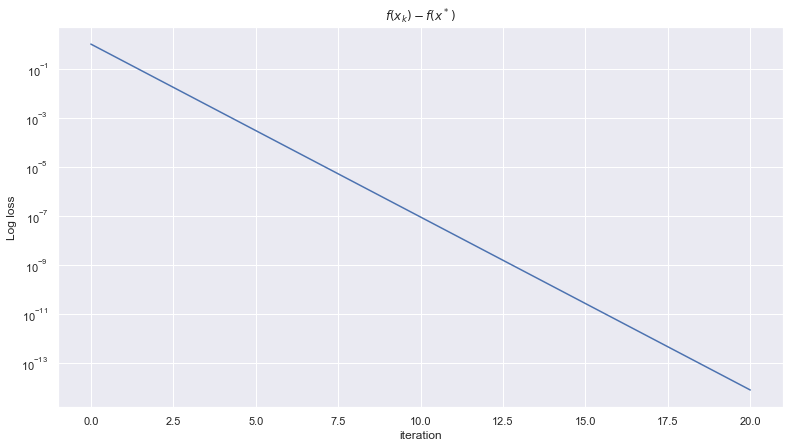

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
plt.semilogy(ydata)
plt.title(f'$f(x_k) - f(x^*)$')
plt.xlabel('iteration')
plt.ylabel('Log loss')
plt.show()

In [14]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "html5"
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
import numpy as np

x_min, x_max = -3, 3
y_min, y_max = 1, 3
N_iter = 4
x_0 = 0.9



fig, ax = plt.subplots()
xdata = np.linspace(x_min,x_max)
ydata = np.sqrt(1 + xdata**2)
plt.plot(xdata, ydata)
plt.title(r'Newton method convergence for  $y = \sqrt{1 + x^2}$')
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x)$')
line, = ax.plot([], [], marker='o', linestyle='-', color='r', label='Newton', lw=2)
plt.legend()
# ax.grid()
xdata, ydata = [x_0], [np.sqrt(1 + x_0**2)]

def data_gen(t=0):
    cnt = 0
    x = x_0
    while cnt < N_iter:
        cnt += 1
        x = -x**3
        yield x


def init():
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    line.set_data(xdata, ydata)
    return line,

def run(data):
    # update the data
    x = data
    y = np.sqrt(1 + x**2)
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

ani = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True, init_func=init)

In [15]:
ani

Text(0, 0.5, 'Log loss')

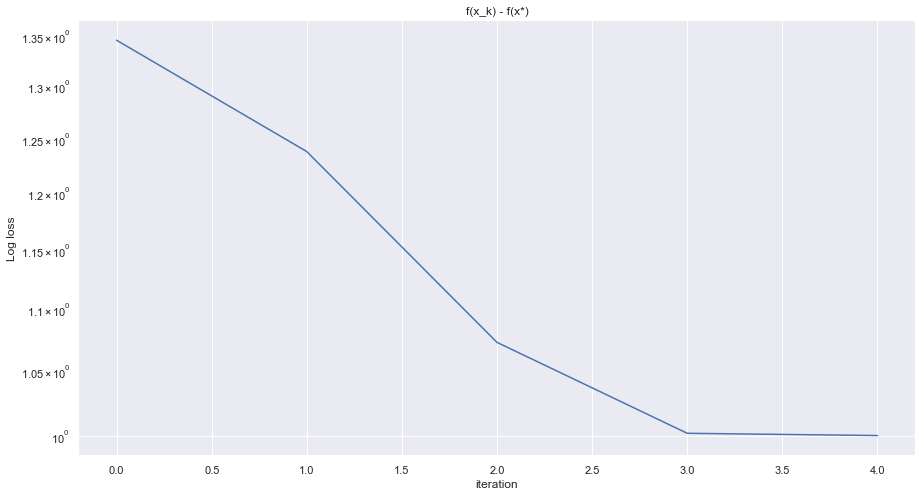

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.semilogy(ydata)
plt.title('f(x_k) - f(x*)')
plt.xlabel('iteration')
plt.ylabel('Log loss')

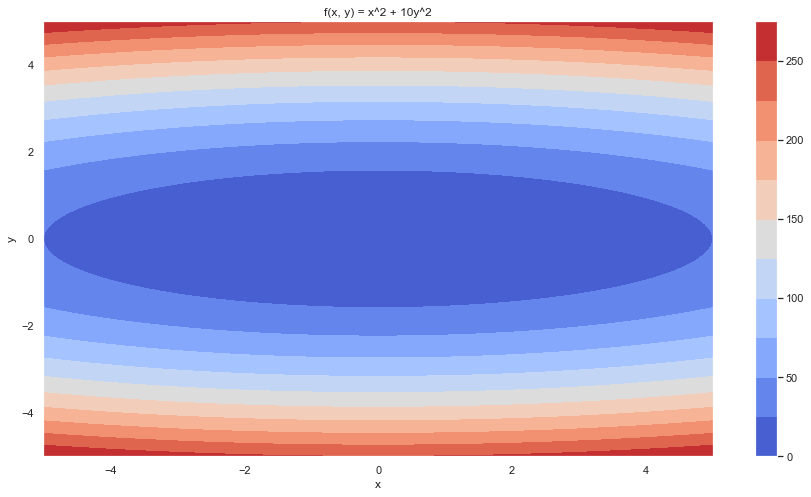

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = X**2 + 10*Y**2

cp = plt.contourf(X, Y, Z, 10, cmap = 'coolwarm')
plt.colorbar(cp, cmap = 'coolwarm')
plt.title('f(x, y) = x^2 + 10y^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
!pip install autograd

  Created wheel for autograd: filename=autograd-1.3-cp37-none-any.whl size=47996 sha256=5a5bde083281448ad6bccae9b39ad73f07e300791205de7a9464c84b70ac322c
  Stored in directory: C:\Users\brati\AppData\Local\pip\Cache\wheels\42\62\66\1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
Successfully built autograd


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

In [44]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [45]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

In [46]:
# It is known
minima = np.array([3., .5])

In [47]:
f(*minima)

0.0

In [48]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

In [49]:
f(*minima_)

array([0.])

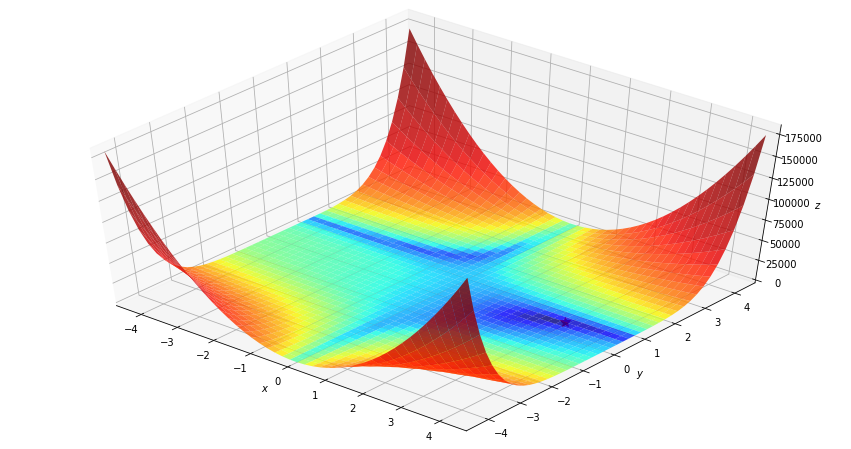

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [58]:
x0 = np.array([1., -3.])

In [59]:
func = value_and_grad(lambda args: f(*args))

In [60]:
res = minimize(func, x0=x0, method='BFGS',
               jac=True, tol=1e-20, callback=print)

[ 0.26169155 -2.31079711]
[ 0.16181111 -2.41543177]
[ 0.12428932 -2.45726361]
[ 0.12301307 -2.45851716]
[ 0.12316645 -2.45814862]
[ 0.12414512 -2.454845  ]
[ 0.12565349 -2.44854074]
[0.67300726 0.12936225]
[0.66947298 0.11256824]
[0.88761687 0.23248483]
[1.27171157 0.19775867]
[2.1455921  0.03555492]
[2.23404917 0.19351201]
[2.53774447 0.42559427]
[2.60629388 0.38085757]
[2.73569183 0.42143378]
[2.89305622 0.47863871]
[2.95148437 0.48856771]
[2.99180967 0.49846504]
[2.99890556 0.4996404 ]
[3.00014956 0.50005237]
[2.99999946 0.49999984]
[3.  0.5]
[3.  0.5]
[3.  0.5]
[3.  0.5]


In [61]:
dict(res)

{'fun': 0.0,
 'jac': array([0., 0.]),
 'hess_inv': array([[3.1178471 , 0.77289681],
        [0.77289681, 0.2132682 ]]),
 'nfev': 47,
 'njev': 47,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 26}

In [62]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

path_ = [x0]

res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))
dict(res)

{'fun': 2.1485484638917032e-19,
 'jac': array([-9.92377429e-11, -1.05307088e-09]),
 'nfev': 32,
 'njev': 132,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 23}

In [63]:
path = np.array(path_).T
path.shape

(2, 24)

(-4.5, 4.5)

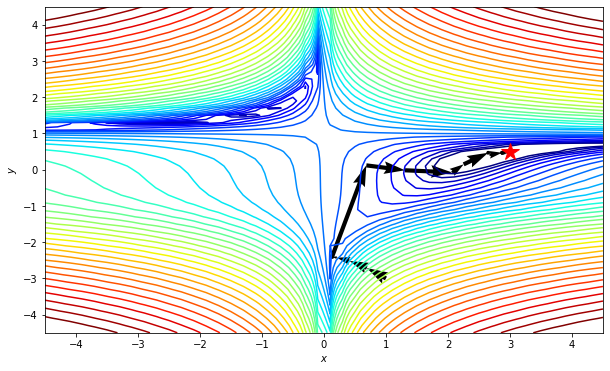

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))